#### Import required libraries:

In [55]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array , to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.optimizers import Adam

#### Initializing data folders

In [56]:
dir_sp_train = "drawings/spiral/training"
dir_sp_test = "drawings/spiral/testing"
dir_wa_train = "drawings/wave/training"
dir_wa_test = "drawings/wave/testing"

In [57]:
Name = []
for file in os.listdir(dir_sp_train):
    Name+=[file]
print (Name)

['healthy', 'parkinson']


In [58]:
# Mapping image to tag
N = []
for i in range(len(Name)):
    N+=[i]

reverse_mapping = dict(zip(N,Name))

#function for getting 0(healthy) and 1(parkinson)
def mapper(value):
    return reverse_mapping[value]

In [59]:
# Creating training dataset for spiral images 
dataset_sp = []
count = 0
for file in os.listdir(dir_sp_train):
    path = os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        dataset_sp.append([image,count])
    count+=1

# Creating testing dataset for spiral images 
testset_sp = []
count = 0
for file in os.listdir(dir_sp_test):
    path = os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        testset_sp.append([image,count])
    count+=1

In [60]:
# Creating training dataset for wave images 
dataset_wa = []
count = 0
for file in os.listdir(dir_wa_train):
    path = os.path.join(dir_wa_train,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        dataset_wa.append([image,count])
    count+=1

# Creating testing dataset for wave images 
testset_wa = []
count = 0
for file in os.listdir(dir_wa_test):
    path = os.path.join(dir_wa_test,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        testset_wa.append([image,count])
    count+=1
        

In [61]:
# Spliting image and it's label
data_sp,lables_sp0 = zip(*dataset_sp)
test_sp,tlables_sp0 = zip(*testset_sp)

data_wa,lables_wa0 = zip(*dataset_wa)
test_wa,tlables_wa0 = zip(*testset_wa)

In [62]:
# Converting labels to numerical(binary) for spiral images
lables_sp1 = to_categorical(lables_sp0)
data_sp = np.array(data_sp)
lables_sp = np.array(lables_sp1)

tlables_sp1 = to_categorical(tlables_sp0)
test_sp = np.array(test_sp)
tlables_sp = np.array(tlables_sp1)

In [63]:
# Converting labels to numerical(binary) data for wave images
lables_wa1 = to_categorical(lables_wa0)
data_wa = np.array(data_wa)
lables_wa = np.array(lables_wa1)

tlables_wa1 = to_categorical(tlables_wa0)
test_wa = np.array(test_wa)
tlables_wa = np.array(tlables_wa1)

In [64]:
# Spiliting data into train and validation data
trainx_sp,validx_sp,trainy_sp,validy_sp = train_test_split(data_sp,lables_sp,test_size=0.2,random_state=44)
trainx_wa,validx_wa,trainy_wa,validy_wa = train_test_split(data_wa,lables_wa,test_size=0.2,random_state=44)

In [65]:
# Viewing shape of data of spiral
print(trainx_sp.shape)
print(validx_sp.shape)
print(trainy_sp.shape)
print(validy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [66]:
# Viewing shape of data of wave
print(trainx_wa.shape)
print(validx_wa.shape)
print(trainy_wa.shape)
print(validy_wa.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


### CNN Model:

In [67]:
# CNN Architecture:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (5,5),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=2,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

print("Model Summary")
model.summary()

Model Summary
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 30976)             0         
                                                                 
 dense_10 (Dense)            (None, 64) 

In [68]:
# training spiral and wave model:
epoch = 100
batch_size = 32

print("Start Training",'\n')
hist_0 = model.fit(trainx_sp,trainy_sp,batch_size=batch_size,epochs=epoch,validation_data=(validx_sp, validy_sp))
hist_1 = model.fit(trainx_wa,trainy_wa,batch_size=batch_size,epochs=epoch,validation_data=(validx_wa, validy_wa))
print("Training end",'\n')

model.save("CNN_Model.h5")

Start Training 

Epoch 1/100
2/2 [==============================] - 1s 294ms/step - loss: 2.0664 - accuracy: 0.4737 - val_loss: 0.6860 - val_accuracy: 0.6000
Epoch 2/100
2/2 [==============================] - 0s 170ms/step - loss: 0.6869 - accuracy: 0.5614 - val_loss: 0.7464 - val_accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 0s 171ms/step - loss: 0.6946 - accuracy: 0.5263 - val_loss: 0.6972 - val_accuracy: 0.4000
Epoch 4/100
2/2 [==============================] - 0s 168ms/step - loss: 0.6941 - accuracy: 0.5263 - val_loss: 0.7092 - val_accuracy: 0.4000
Epoch 5/100
2/2 [==============================] - 0s 176ms/step - loss: 0.6911 - accuracy: 0.5263 - val_loss: 0.7041 - val_accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 178ms/step - loss: 0.6910 - accuracy: 0.5263 - val_loss: 0.7017 - val_accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 0s 184ms/step - loss: 0.6906 - accuracy: 0.5263 - val_loss: 0.7004 - val_accuracy: 0.4

### Visualizing accuracy and loss of training and validation dataset:

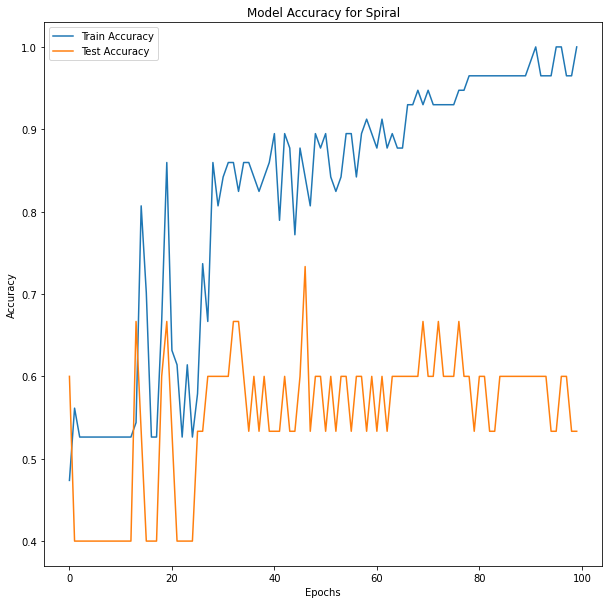

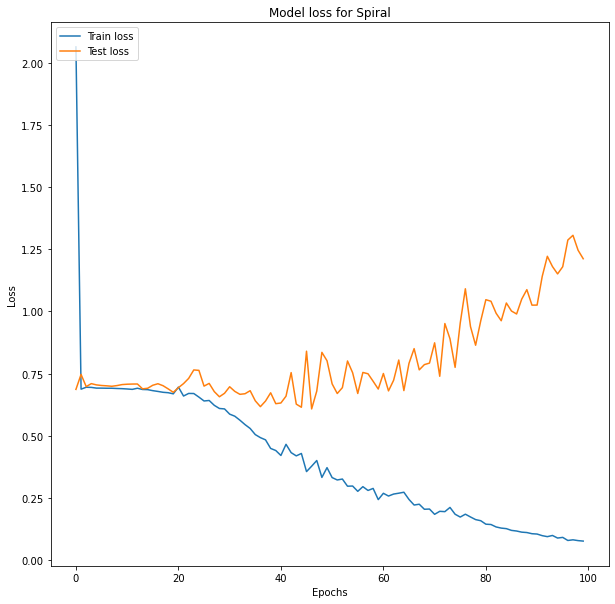

In [69]:
# for Spiral dataset:
figure = plt.figure(figsize=(10,10))
plt.plot(hist_0.history['accuracy'],label= 'Train Accuracy')
plt.plot(hist_0.history['val_accuracy'],label= 'Test Accuracy')
plt.title("Model Accuracy for Spiral")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.show()

figure2 = plt.figure(figsize=(10,10))
plt.plot(hist_0.history['loss'],label= 'Train loss')
plt.plot(hist_0.history['val_loss'],label= 'Test loss')
plt.title("Model loss for Spiral")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left')
plt.show()

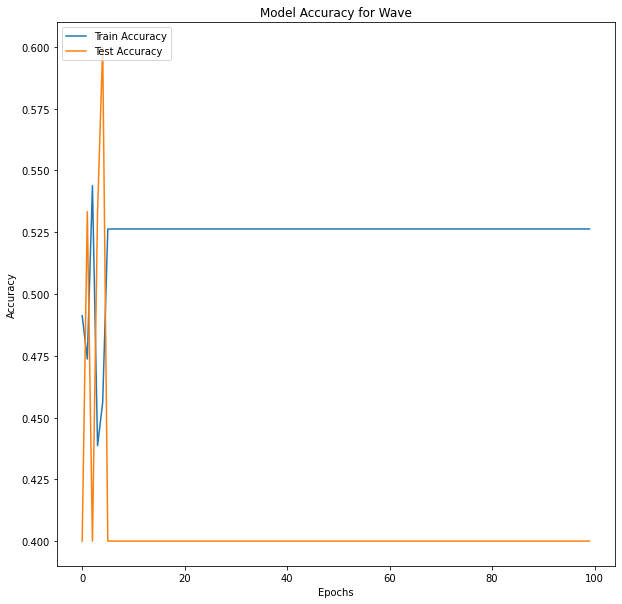

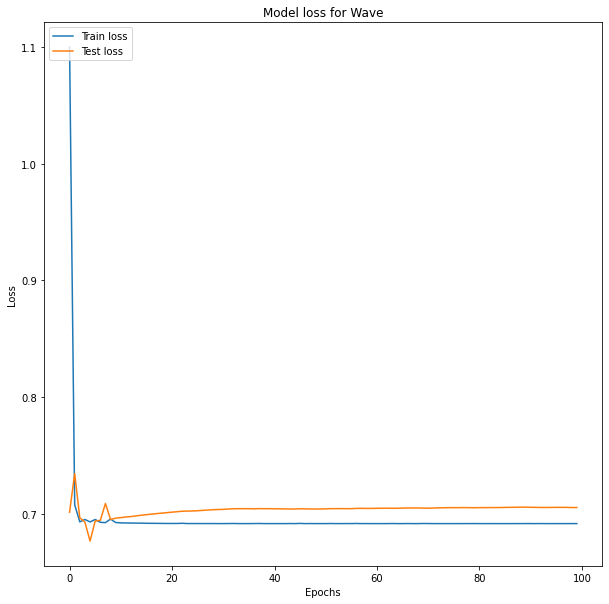

In [70]:
# for Wave dataset:
figure = plt.figure(figsize=(10,10))
plt.plot(hist_1.history['accuracy'],label= 'Train Accuracy')
plt.plot(hist_1.history['val_accuracy'],label= 'Test Accuracy')
plt.title("Model Accuracy for Wave")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.show()

figure2 = plt.figure(figsize=(10,10))
plt.plot(hist_1.history['loss'],label= 'Train loss')
plt.plot(hist_1.history['val_loss'],label= 'Test loss')
plt.title("Model loss for Wave")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left')
plt.show()

### Conclusion of CNN model:
Overfitting occurs because the model cannot generalize and fits too closely to the training dataset. Overfitting happens due to several reasons, here, The training data size is too small and does not contain enough data samples to accurately represent all possible input data values.